# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [114]:
### Ваш код здесь ###
# Ваш код здесь
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [115]:
### Ваш код здесь ###
df = pd.read_csv('5.5 data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [116]:
nums = []
for col in df.columns:
    if df[col].dtype != 'object':
        print(col)
        print(df[col].describe())
        print('-'*5)
        nums.append(col)
        
    

LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
-----
LotArea_M
count     1460.000000
mean       977.044879
std        927.289456
min        120.773900
25%        701.742811
50%        880.581085
75%       1077.814155
max      19996.906235
Name: LotArea_M, dtype: float64
-----
OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
-----
OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
-----
YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.

2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [117]:
df.corr(numeric_only=True)#.head(1)

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [118]:

### Ваш код здесь ###
df_corr = df.corr(numeric_only=True)
feats_to_del = []
for col in df_corr.columns:

    if len(df_corr[df_corr[col] >=1].index) > 1:
        
        for feat in df_corr[df_corr[col] >=1].index:
            
            if feat == col:
                continue
            elif col in feats_to_del:
                continue
            elif '_M' in feat:
                continue
            else:
                feats_to_del.append(feat)
    
    
df = df.drop(feats_to_del, axis=1)



In [119]:
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,204.200794,3,Gd,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,GasA,Ex,Y,153.011241,3,TA,42.735380,8/2007,Normal,175000
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,GasA,TA,Y,192.587919,2,TA,46.451500,2/2010,Normal,210000
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,GasA,Ex,Y,217.393020,2,Gd,23.411556,5/2010,Normal,266500
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,GasA,Gd,Y,100.149434,1,Gd,22.296720,4/2010,Normal,142125


3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

In [120]:
colors = [
    'darkorchid',
    'r',
    'g',
    'b',
    'khaki',
    'tan',
    'c',
    'm',
    'y',
    'k',
]

In [121]:
df.corr().columns

C:\Users\user\AppData\Local\Temp\ipykernel_11300\2585382027.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Index(['LotArea_M', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF_M', 'GrLivArea_M', 'Bath', 'GarageArea_M', 'SalePrice'],
      dtype='object')

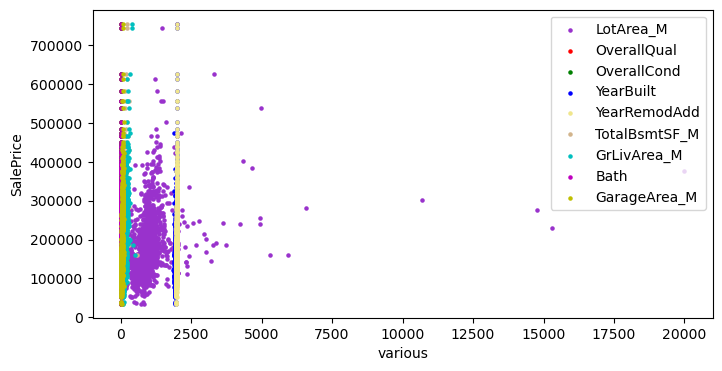

In [122]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
counter = 0
for col in df.corr(numeric_only=True).columns:
    if col == 'SalePrice':
        continue
    #elif col in [
#         'LotArea',
#         'OverallQual',
#         'OverallCond', 
#         'YearBuilt',
#         'YearRemodAdd',
#         'TotalBsmtSF', 
#         'GrLivArea', 
#         'Bath', 
#         'GarageArea'
    #]:
     #   continue          
    tst = df[[col, 'SalePrice']]
    tst = tst.sort_values('SalePrice')
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], c=colors[counter], label=col, s=5)
    counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

4. Сделайте предварительные выводы.

### Ваш вывод здесь ###
1. Больше всего в зависимости от стоимости скачет площадь, lotArea - а скорее, наоборот - на графике это можно проследить, хоть и нужно признать, что "разлет" присутствует немалый.
2. Остальные колонки как будто не двигаются, но на самом деле это из-за выбросов Площади - попробуем отсечь виллы и дворцы:


In [123]:
df2 = df.copy()
df2[df2['LotArea_M'] > 2100] = 2100

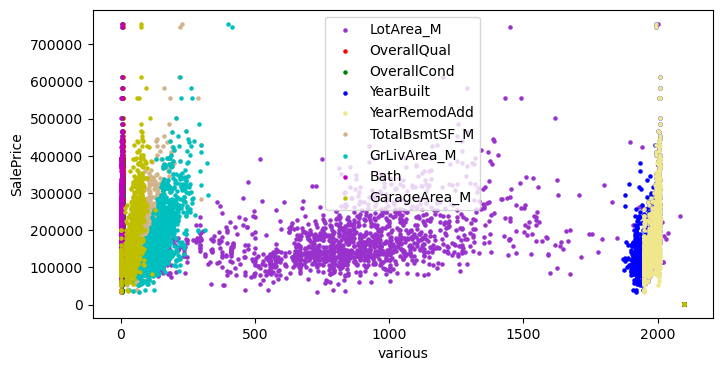

In [124]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
counter = 0
for col in df.corr(numeric_only=True).columns:
    if col == 'SalePrice':
        continue
         
    tst = df2[[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], c=colors[counter], label=col, s=5)
    counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

3. а вот и остальные колонки поползли "вперед" более отчетливо - кроме, пожалуй, ванной комнаты
4. Боюсь ничего неожиданного датасет нам не показал - за большую стоимость мы получаем бОльшую жилплощадь.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

Попробуем проследить как влияет отсутствие ремонта на протяжении времени на стоимость - предположение - цена должна ползти вниз - естественный износ и пр., ведь так?

In [125]:
df['YearsWithoutRemod'] = df['YearRemodAdd'] - df['YearBuilt']

In [126]:
tst2 = df.copy()

tst2.head(3)

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice,YearsWithoutRemod
0,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500,0
1,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500,0
2,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500,1


In [127]:
tst2['YearsWithoutRemod'].describe()

count    1460.000000
mean       13.597945
std        24.476465
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       123.000000
Name: YearsWithoutRemod, dtype: float64

## Ваш код здесь ##
тут был код пайплот, но ровно в этот момент коллега посоветовал похожую библиотеку


plt.figure(figsize=(8,4))
plt.scatter( tst2['YearsWithoutRemod'], tst2['SalePrice'], s=5)
plt.xlabel('YearsWithoutRemod')
plt.ylabel('SalePrice')
plt.show()

In [139]:
import plotly.express as px

fig = px.scatter(tst2, x='YearsWithoutRemod', y='SalePrice', )
fig.update_xaxes(title_text='YearsWithoutRemod')
fig.update_yaxes(title_text='SalePrice')

fig.show()

Еще гиппотеза: цены на жилье растут, т.е. чем раньше будет дата продажи от "сегодня" - тем цена должна быть ниже, иными словами численной выражение времени, прошедшего с продаже должно расти, а стоимость одновременно падать. проверимс

In [129]:
# раньше 2000 года продаж не зафиксированно, по этому нет смысла раздувать график, отнимем "двадцатку" и посчитаем, 
# скажем, в месяцах
df['HowMuchTimePassedSinceItWasSold'] = df['DateSold'].apply(lambda x:(eval(x.split('/')[1])-2000)*12 + 
                                                             eval(x.split('/')[0]))

In [151]:
tst3 = df.copy()
fig = px.box(tst3, x='HowMuchTimePassedSinceItWasSold', y='SalePrice', )
fig.update_xaxes(title_text='HowMuchTimePassedSinceItWasSold')
fig.update_yaxes(title_text='SalePrice')

fig.show()

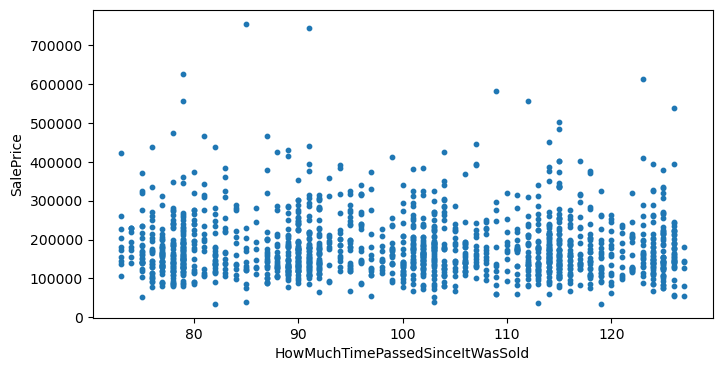

In [131]:
tst3 = df.copy()
tst3 = tst3.sort_values('HowMuchTimePassedSinceItWasSold')
### Ваш код здесь ###
plt.figure(figsize=(8,4))

plt.scatter( tst3['HowMuchTimePassedSinceItWasSold'], tst3['SalePrice'], s=10)


plt.xlabel('HowMuchTimePassedSinceItWasSold')
plt.ylabel('SalePrice')

plt.show()

кажется, зависимости нет:(

попробуем "попроще" - есть ли зависимость между готом продажу и ценой жилья?

In [152]:
df['YearSold'] = df['DateSold'].apply(lambda x:(eval(x.split('/')[1])))
tst4 = df.copy()

In [153]:
fig = px.box(tst4, x='YearSold', y='SalePrice', )
fig.update_xaxes(title_text='YearSold')
fig.update_yaxes(title_text='SalePrice')

fig.show()

медиана даже немного падает - допустим, это волатильность - я бы не стал делать выводы о зависимости и общем падении стоимости недвижимости

Итого, не уверен, нашел ли я что то полезное, но, возможно, колонка с количеством времени без ремонта чем то поможет модели

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [133]:
### Ваш код здесь ###

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [134]:
### Ваш код здесь ###

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [135]:
### Ваш код здесь ###

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [136]:
### Ваш код здесь ###

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [137]:
### Ваш код здесь ###

Посмотрите на веса полученной модели. Какой вывод можно сделать?

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [138]:
### Ваш код здесь ###

Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 